In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#read the train file
path = "/kaggle/input/titanic/"
data = pd.read_csv(path+"train.csv", header=0)

In [3]:
#check the columns in our dataframe
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
#set teh white background in our plot
sns.set(style="white", rc={"lines.linewidth": 3})

In [5]:
#fill null valule in age column
data.Age.fillna(method = 'ffill', inplace=True)

First, we need to add following two columns in our dataframe
1. Lived :- We will mark the column as 1 if passenger was Lived.
2. Died :- We will mark the column as 1 if passenger was dead.

In [6]:
#add new column Lived or Died
data['Lived'] = data.Survived.apply(lambda x : 1 if x == 1 else 0)
data['Died'] = data.Survived.apply(lambda x : 1 if x == 0 else 0)

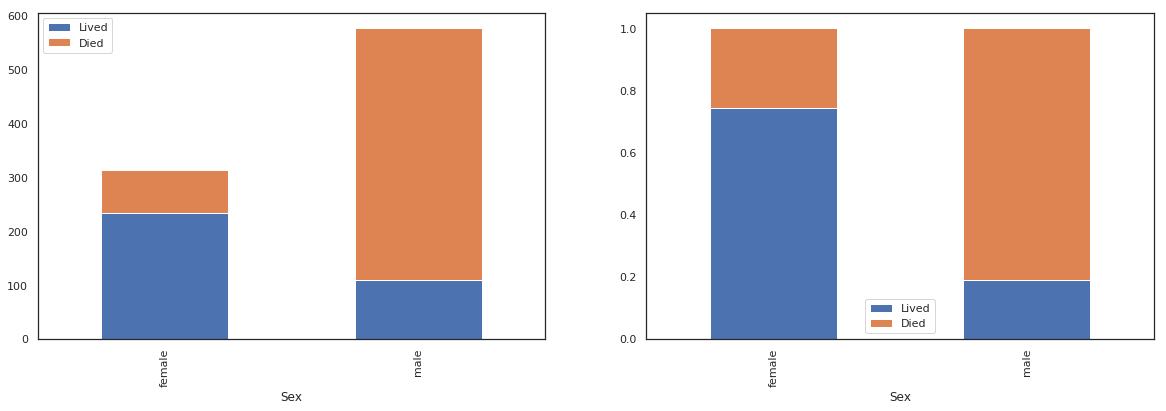

In [7]:
#gender against survival
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
data.groupby('Sex').sum()[['Lived', 'Died']].plot(ax=axes[0] ,kind='bar', stacked=True)
data.groupby('Sex').mean()[['Lived', 'Died']].plot(ax=axes[1], kind='bar', stacked=True)

This plot show us the majority of passanger gender while onboard and there survival status. 
It shows that male were twice then female on the ship but they are unlucky because when ship shink only one sixth is survived which is one third of survival. If we look into the right plot it shows us the rate of survival.
While rescuing the passanger female got the priroty. But there is still some male survival.

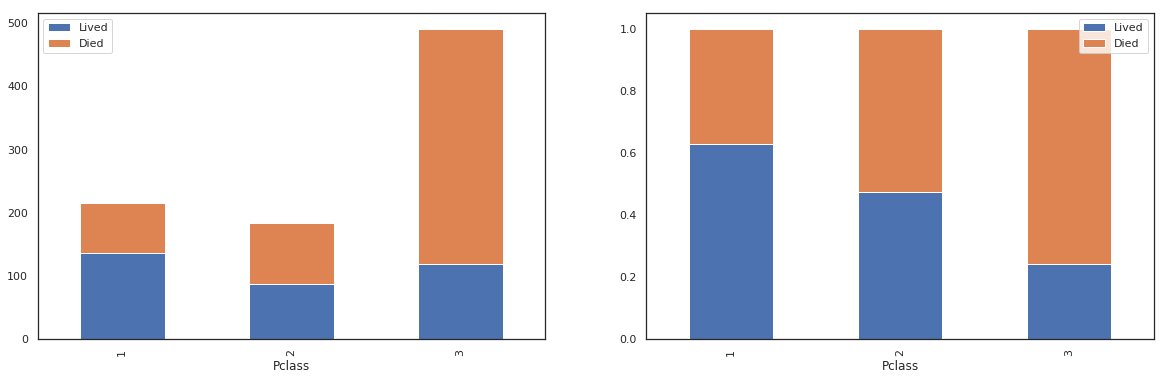

In [8]:
#class against survival

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
data.groupby('Pclass').agg('sum')[['Lived', 'Died']].plot(ax=axes[0], kind='bar', stacked=True)
data.groupby('Pclass').agg('mean')[['Lived', 'Died']].plot(ax=axes[1], kind='bar', stacked=True)

While we look into class wise this tell first class passangers got the first priorty then other class.
Onboard third class passangers had the high population then first and last one was second class.
First class are the one which is having high number of surviver and third class had to sacrifice more people.
At the right side it shows that while rescuing the passangers class shows us the priorty. High class means high priorty.

Let add one more column which will show the category for passanger age. Following the category distibution.
1. Child :- Passanger having age below 16
2. Adult :- Passanger having age equal to 16 or less then 60.
3. Senior Citizen :- Passanger having age 60 or above.

We are only going to use three category in our model.

In [9]:
data['Category'] = data.Age.apply(lambda x : 'Child' if x < 16 else 'Adult' if x < 60 else 'Senior Citizen')

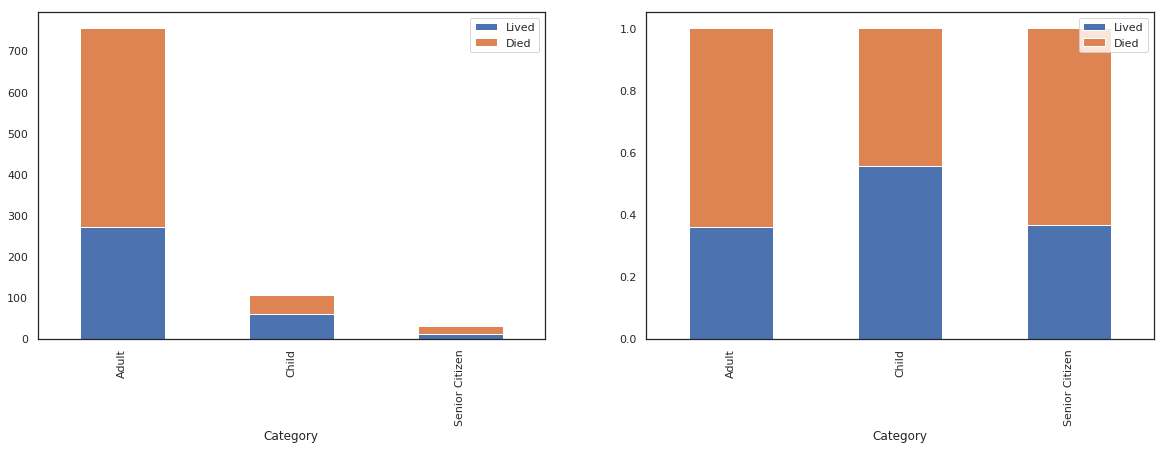

In [10]:
#survival rate against Category

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

data.groupby('Category').sum()[['Lived', 'Died']].plot(ax=axes[0], kind='bar', stacked=True)
data.groupby('Category').mean()[['Lived', 'Died']].plot(ax=axes[1], kind='bar', stacked=True)

This shock us that there are only few child and senior citizen on board and child get the high priorty while rescuing. But still a lot of child died.

In [11]:
#age distribution

age_hist = pd.DataFrame()

age_hist['Age'] = pd.Series(range(0, 100, 10))
age_hist['Count'] = age_hist.Age.apply(lambda x : data[(data.Age < x) & (data.Age > x - 10)].shape[0])
age_hist['Lived'] = age_hist.Age.apply(lambda x : data[(data.Age < x) & (data.Age > x - 10) & (data.Lived == 1)].shape[0])


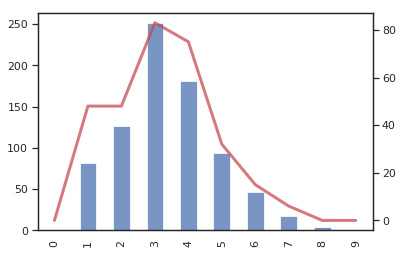

In [12]:
ax = age_hist.Count.plot(alpha = .75, kind='bar')
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), age_hist.Lived, alpha = .75, color = 'r')

This plot show us that people in there 30s were traving on board and they are the one higly rescued. This might be because they having the majority on board.

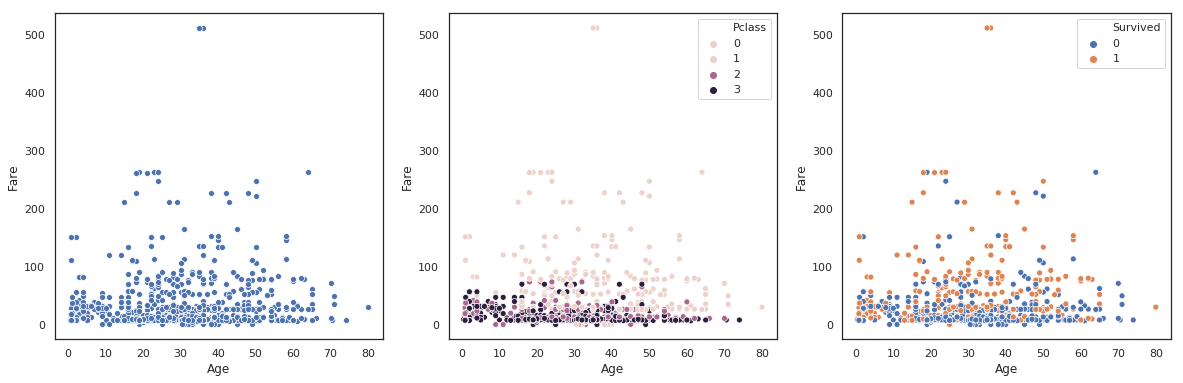

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,6))
sns.scatterplot(x='Age', y='Fare', data = data, ax=ax[0])
sns.scatterplot(x='Age', y='Fare', hue='Pclass', data = data, ax=ax[1])
sns.scatterplot(x='Age', y='Fare', hue='Survived', data = data, ax=ax[2])


This plot shows us that how much passengers spend for there ticket. Also show which class cost much. As usual first class pay the most. And higher the fare passenger pay higher the chance passenger will surviver.

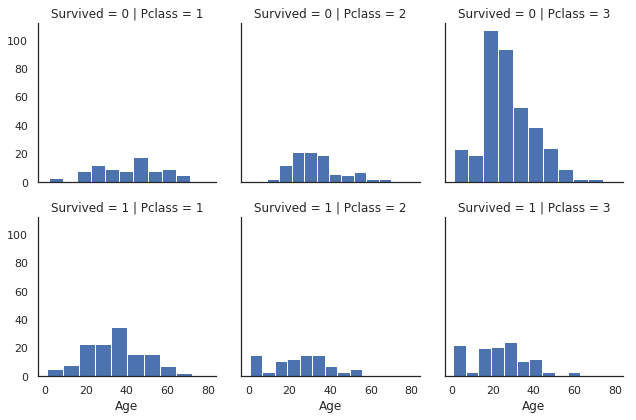

In [14]:
g = sns.FacetGrid(data, col='Pclass', row='Survived')
g = g.map(plt.hist, 'Age')

This plot show us that survival status according to class and age.
First class and second class child less the or equle to 10 get higer priorty.
But third class got the last priorty. But from each class equal count of people was saved. But at the rate prospective third class got unluck might be based on priorty or there population.

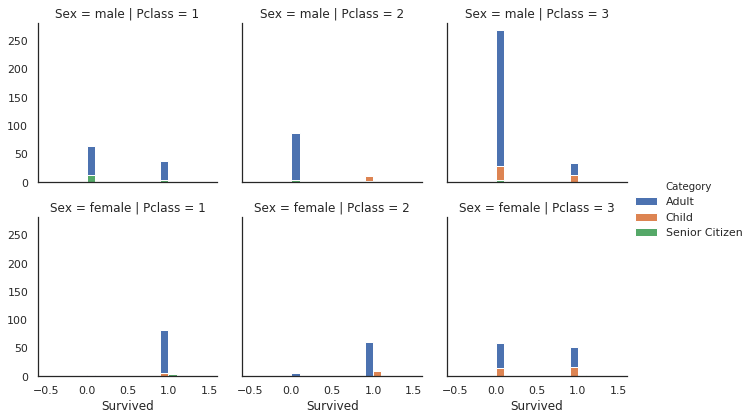

In [15]:
spc_data = data.groupby(['Sex','Pclass','Category']).sum()[['Lived','Died']].reset_index()
spc_plot = sns.FacetGrid(hue='Category', row='Sex', col='Pclass', data=data)
spn_plot = spc_plot.map(plt.hist, 'Survived')
#spc_plot.map(plt.scatter, 'Survived')
spc_plot.add_legend()

Above plot show that in each class which gender and category gets the priorty and which not.
1. In first class no live was loos in female. First, they rescue all the females then other male child to adult get the priorty to get rescued.
2. In Second class, First, they rescue child then adult female. In this process few adult females and all the males died.
3. Last, in third class they only rescure few child and adult female and males.

The mose wierd pattren is that why only few male and female child and adult category passanger survived or rescured. The ans is lied under the family size and the number of family member on board.

But we will not take that in account because we will only use featurs 'Age', 'Fare', 'Sex', 'Category' in account while training our model this might make some noise in our model but that noise will be less.

Lets train our model by using Age, Fare, Sex and Category features.
Change the lables text to int

In [16]:
train_feature, train_label = data[['Age', 'Fare', 'Sex', 'Category']], data.Survived
train_feature.Sex = train_feature.Sex.apply(lambda x : 0 if x == 'male' else 1)
train_feature.Category = train_feature.Category.apply(lambda x : 0 if x == 'Child' else 1 if x == 'Adult' else 2)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [17]:
survival_model = RandomForestClassifier(n_estimators=10)
survival_model.fit(train_feature, train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
#read the train data

test_feature = pd.read_csv(path+"test.csv", header=0)
test_feature.Age.fillna(method = 'ffill', inplace=True)
test_feature.Fare.fillna(method = 'ffill', inplace=True)

gender_summission = pd.DataFrame()
gender_summission['PassengerId'] = test_feature.PassengerId

test_feature['Category'] = test_feature.Age.apply(lambda x : 'Child' if x < 16 else 'Adult' if x < 60 else 'Senior Citizen')

test_feature = test_feature[['Age', 'Fare', 'Sex', 'Category']]

test_feature.Sex = test_feature.Sex.apply(lambda x : 0 if x == 'male' else 1)
test_feature.Category = test_feature.Category.apply(lambda x : 0 if x == 'Child' else 1 if x == 'Adult' else 2)


In [19]:
gender_summission['Survived'] = survival_model.predict(test_feature)

In [20]:
gender_summission.to_csv('gender_submission.csv', index=False)

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 